<a href="https://www.kaggle.com/code/rakshitacharya/final-project?scriptVersionId=101136968" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import confusion_matrix , classification_report
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout, Dot, RepeatVector, ConvLSTM1D, Reshape, MaxPooling3D
from tensorflow.keras.layers import Conv2D,MaxPooling2D ,Conv3D, BatchNormalization,Permute, Concatenate

## Testing data frame

In [2]:
import os
from PIL import Image
test_dic = {"Potato___Late_blight":[],"Potato___Early_blight":[],"Potato___healthy":[]}

x = ["Potato___Late_blight","Potato___Early_blight","Potato___healthy"]
for i in x:
    count = 0
    for dirname, _, filenames in os.walk('/kaggle/input'):
        if "Test" in dirname:
            if i in dirname:
                for filename in filenames:
                    count += 1
                    x= os.path.join(dirname, filename)
                    im = Image.open(x)
                    im = im.resize((128,128))
                    pix_val = list(im.getdata())
                    pix_val_flat = [x for sets in pix_val for x in sets]
                    test_dic[i].append(pix_val_flat)
                    
    print(count)


200
200
30


In [3]:
import pandas as pd
df = pd.DataFrame([test_dic['Potato___healthy'][0]])

df.to_csv("try0.csv" , index = False)

import csv
with open("./try0.csv", "a") as f:
    writer = csv.writer(f)
    for i in range(1, len(test_dic['Potato___healthy'])):
        #print(len(test_dic['Potato___healthy'][i]))
        writer.writerow(test_dic['Potato___healthy'][i])
        

df2 = pd.read_csv("./try0.csv")
df2["class"] = 0
print(df2.shape)

import pandas as pd
df = pd.DataFrame([test_dic['Potato___Late_blight'][0]])
df.to_csv("try1.csv" , index = False)

import csv
with open("./try1.csv", "a") as f:
    writer = csv.writer(f)
    for i in range(1, len(test_dic['Potato___Late_blight'])):
        writer.writerow(test_dic['Potato___Late_blight'][i])
        

df3 = pd.read_csv("./try1.csv")
df3["class"] = 1
print(df3.shape)


import pandas as pd
df = pd.DataFrame([test_dic['Potato___Early_blight'][0]])
df.to_csv("try2.csv" , index = False)

import csv
with open("./try2.csv", "a") as f:
    writer = csv.writer(f)
    for i in range(1, len(test_dic['Potato___Early_blight'])):
        writer.writerow(test_dic['Potato___Early_blight'][i])
        

df4 = pd.read_csv("./try2.csv")
df4["class"] = 2
print(df4.shape)



(30, 49153)
(200, 49153)
(200, 49153)


In [4]:
test_df = pd.concat([df2, df3, df4], ignore_index=True)
test_df.shape

(430, 49153)

## Training data frame

In [5]:
import os
from PIL import Image
train_dic = {"Potato___Late_blight":[],"Potato___Early_blight":[],"Potato___healthy":[]}

x = ["Potato___Late_blight","Potato___Early_blight","Potato___healthy"]
for i in x:
    count = 0
    for dirname, _, filenames in os.walk('/kaggle/input'):
        if "Train" in dirname:
            if i in dirname:
                for filename in filenames:
                    count += 1
                    x= os.path.join(dirname, filename)
                    im = Image.open(x)
                    im = im.resize((128,128))
                    pix_val = list(im.getdata())
                    pix_val_flat = [x for sets in pix_val for x in sets]
                    train_dic[i].append(pix_val_flat)
                    
    print(count)


800
800
122


In [6]:
print(len(train_dic[i][0]))

49152


#### healthy

In [7]:
import pandas as pd
df = pd.DataFrame([train_dic['Potato___healthy'][0]])
df.to_csv("tryt0.csv" , index = False)
df.head()

import csv
with open("./tryt0.csv", "a") as f:
    writer = csv.writer(f)
    for i in range(1, len(train_dic["Potato___healthy"])):
        #print(len(test_dic["Potato___healthy"][i]))
        writer.writerow(train_dic["Potato___healthy"][i]) 
    
healthy_train = pd.read_csv("./tryt0.csv")
healthy_train["class"] = 0
healthy_train.shape


(122, 49153)

#### late blight

In [8]:
import pandas as pd
df = pd.DataFrame([train_dic['Potato___Late_blight'][0]])
df.to_csv("tryt1.csv" , index = False)

with open("./tryt1.csv", "a") as f:
    writer = csv.writer(f)
    for i in range(1, 300):
        #print(len(test_dic["Potato___healthy"][i]))
        writer.writerow(train_dic["Potato___Late_blight"][i]) 
    
df6 = pd.read_csv("./tryt1.csv")
df6["class"] = 1
df6.to_csv("late_blight0.csv", index = False)
print(df6.shape)


df = pd.DataFrame([train_dic['Potato___Late_blight'][0]])
df.to_csv("tryt1.csv" , index = False)

import csv
with open("./tryt1.csv", "a") as f:
    writer = csv.writer(f)
    for i in range(300, 600):
        #print(len(test_dic["Potato___healthy"][i]))
        writer.writerow(train_dic["Potato___Late_blight"][i]) 
    
df8 = pd.read_csv("./tryt1.csv")
df8["class"] = 1
df8.to_csv("late_blight2.csv", index = False)
print(df8.shape)


df = pd.DataFrame([train_dic['Potato___Late_blight'][0]])
df.to_csv("tryt1.csv" , index = False)
df.head()

with open("./tryt1.csv", "a") as f:
    writer = csv.writer(f)
    for i in range(600, 800):
        #print(len(test_dic["Potato___healthy"][i]))
        writer.writerow(train_dic["Potato___Late_blight"][i]) 
    
df19 = pd.read_csv("./tryt1.csv")
df19["class"] = 1
df19.to_csv("late_blight4.csv", index = False)
print(df19.shape)

(300, 49153)
(301, 49153)
(201, 49153)


In [9]:
late_blight_df = pd.concat([df6, df8,df19], ignore_index=True)
late_blight_df.shape

(802, 49153)

#### Early blight

In [10]:
import pandas as pd
df = pd.DataFrame([train_dic['Potato___Early_blight'][0]])
df.to_csv("tryt2.csv" , index = False)
df.head()

import csv
with open("./tryt2.csv", "a") as f:
    writer = csv.writer(f)
    for i in range(1, 400):
        #print(len(test_dic["Potato___healthy"][i]))
        writer.writerow(train_dic["Potato___Early_blight"][i]) 
    
df10 = pd.read_csv("./tryt2.csv")
df10["class"] = 2
df10.to_csv("early_blight0.csv", index = False)
df10.shape


(400, 49153)

In [11]:
import pandas as pd
df = pd.DataFrame([train_dic['Potato___Early_blight'][0]])
df.to_csv("tryt2.csv" , index = False)
df.head()

import csv
with open("./tryt2.csv", "a") as f:
    writer = csv.writer(f)
    for i in range(400, 800):
        #print(len(test_dic["Potato___healthy"][i]))
        writer.writerow(train_dic["Potato___Early_blight"][i]) 
    
df12 = pd.read_csv("./tryt2.csv")
df12["class"] = 2
df12.to_csv("early_blight2.csv", index = False)
df12.shape


(401, 49153)

In [12]:
early_blight_df = pd.concat([df10, df12], ignore_index=True)
early_blight_df.shape

(801, 49153)

# MAIN

In [13]:
final_df = pd.concat([healthy_train, early_blight_df , test_df, late_blight_df], ignore_index = True)
final_df.shape

(2155, 49153)

In [14]:
final_df["class"].value_counts()

1    1002
2    1001
0     152
Name: class, dtype: int64

In [15]:
Label = final_df["class"]
Data = final_df.drop(columns=["class"]) 

In [16]:
oversample = RandomOverSampler()
Data,Label  = oversample.fit_resample(Data,Label)
Data = np.array(Data).reshape(-1,128,128,3)
print('Shape of Data :',Data.shape)

Shape of Data : (3006, 128, 128, 3)


In [17]:
Label.value_counts()

0    1002
2    1002
1    1002
Name: class, dtype: int64

In [18]:
classes = {0 : "healthy",
           1: "late_blight",
           2 : "early_blight"}

In [19]:
X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.14 , random_state = 49)

In [20]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.75
                                            , min_lr=0.00001)

In [22]:
datagen = ImageDataGenerator(rescale=(1./255),
                             horizontal_flip = True
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)
testgen = ImageDataGenerator(rescale=(1./255))

# VGG16

In [23]:
base_model = tf.keras.applications.VGG16(input_shape=(128,128,3),
                                               include_top=False,
                                                weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False
    
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(512,activation="relu")(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
prediction = tf.keras.layers.Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)

2022-07-18 14:13:51.615042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 14:13:51.754752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 14:13:51.755635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 14:13:51.756815: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [24]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history1 = model.fit(X_train ,
                    y_train ,
                    epochs=20 ,
                    batch_size=64,
                    validation_split = 0.33,
                    callbacks=[learning_rate_reduction])

2022-07-18 14:13:54.838979: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 680656896 exceeds 10% of free system memory.
2022-07-18 14:13:55.552586: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 680656896 exceeds 10% of free system memory.
2022-07-18 14:13:56.071474: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-07-18 14:13:58.079711: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


28/28 [==============================] - ETA: 0s - loss: 15.6968 - accuracy: 0.7250

2022-07-18 14:14:07.491491: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 335806464 exceeds 10% of free system memory.
2022-07-18 14:14:07.994052: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 335806464 exceeds 10% of free system memory.


28/28 [==============================] - 14s 146ms/step - loss: 15.6968 - accuracy: 0.7250 - val_loss: 0.9303 - val_accuracy: 0.8033
Epoch 2/20
28/28 [==============================] - 2s 69ms/step - loss: 1.1077 - accuracy: 0.8458 - val_loss: 0.7556 - val_accuracy: 0.8923
Epoch 3/20
28/28 [==============================] - 2s 70ms/step - loss: 0.2279 - accuracy: 0.9393 - val_loss: 0.3253 - val_accuracy: 0.9286
Epoch 4/20
28/28 [==============================] - 2s 69ms/step - loss: 0.5718 - accuracy: 0.9145 - val_loss: 0.2241 - val_accuracy: 0.9368
Epoch 5/20
28/28 [==============================] - 2s 68ms/step - loss: 0.3227 - accuracy: 0.9336 - val_loss: 0.0883 - val_accuracy: 0.9719
Epoch 6/20
28/28 [==============================] - 2s 72ms/step - loss: 0.1912 - accuracy: 0.9630 - val_loss: 0.4504 - val_accuracy: 0.9169
Epoch 7/20
28/28 [==============================] - 2s 69ms/step - loss: 0.1319 - accuracy: 0.9809 - val_loss: 0.0966 - val_accuracy: 0.9801
Epoch 8/20
28/28 [===

In [25]:
y_pred  = model.predict(X_test).round()
target_names = [f"{classes[i]}" for i in range(3)]
print(classification_report(y_test, y_pred , target_names =target_names ))

2022-07-18 14:14:46.587189: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165543936 exceeds 10% of free system memory.


              precision    recall  f1-score   support

     healthy       0.99      1.00      0.99       143
 late_blight       0.98      0.95      0.97       153
early_blight       0.96      0.98      0.97       125

   micro avg       0.98      0.98      0.98       421
   macro avg       0.98      0.98      0.98       421
weighted avg       0.98      0.98      0.98       421
 samples avg       0.98      0.98      0.98       421



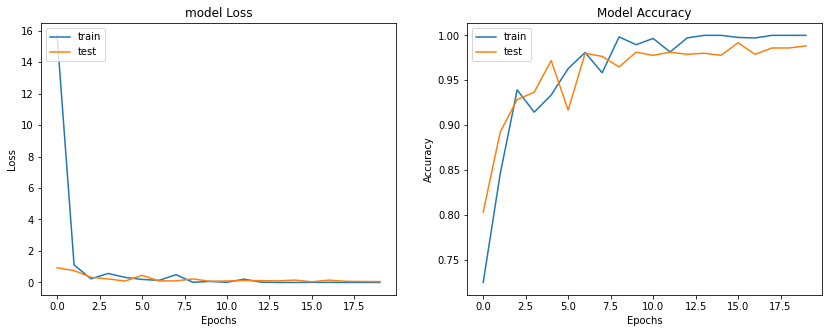

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model.save("vgg16.h5")

# VGG19

In [28]:
base_model = tf.keras.applications.VGG19(input_shape=(128,128,3),
                                               include_top=False,
                                                weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False
    
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(512,activation="relu")(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
prediction = tf.keras.layers.Dense(3, activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=prediction)

80150528/80134624 [==============================] - 1s 0us/step


In [29]:
from tensorflow.keras.optimizers import RMSprop
model2.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history2 = model2.fit(X_train ,
                    y_train ,
                    epochs=20 ,
                    batch_size=64,
                    validation_split = 0.33,
                    callbacks=[learning_rate_reduction])

Epoch 1/20
28/28 [==============================] - 4s 111ms/step - loss: 13.5810 - accuracy: 0.7077 - val_loss: 3.8354 - val_accuracy: 0.7131
Epoch 2/20
28/28 [==============================] - 2s 81ms/step - loss: 0.8155 - accuracy: 0.8891 - val_loss: 0.1141 - val_accuracy: 0.9684
Epoch 3/20
28/28 [==============================] - 2s 81ms/step - loss: 1.0540 - accuracy: 0.8879 - val_loss: 0.1625 - val_accuracy: 0.9590
Epoch 4/20
28/28 [==============================] - 2s 80ms/step - loss: 0.2483 - accuracy: 0.9480 - val_loss: 0.2009 - val_accuracy: 0.9532

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
Epoch 5/20
28/28 [==============================] - 3s 102ms/step - loss: 0.1056 - accuracy: 0.9734 - val_loss: 0.4802 - val_accuracy: 0.8981
Epoch 6/20
28/28 [==============================] - 2s 81ms/step - loss: 0.1820 - accuracy: 0.9682 - val_loss: 0.1582 - val_accuracy: 0.9742
Epoch 7/20
28/28 [==============================] - 2s 80ms/step - los

In [30]:
y_pred  = model2.predict(X_test).round()
target_names = [f"{classes[i]}" for i in range(3)]
print(classification_report(y_test, y_pred , target_names =target_names ))

              precision    recall  f1-score   support

     healthy       0.97      1.00      0.99       143
 late_blight       0.99      0.97      0.98       153
early_blight       0.98      0.98      0.98       125

   micro avg       0.98      0.98      0.98       421
   macro avg       0.98      0.98      0.98       421
weighted avg       0.98      0.98      0.98       421
 samples avg       0.98      0.98      0.98       421



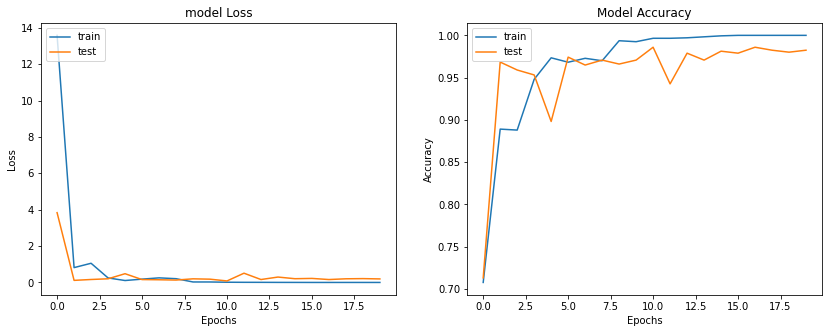

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model2.save("vgg19.h5")

# RESNET50

In [33]:
base_model = tf.keras.applications.ResNet50(input_shape=(128,128,3),
                                               include_top=False,
                                                weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False
    
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(512,activation="relu")(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
prediction = tf.keras.layers.Dense(3, activation='softmax')(x)

model3 = Model(inputs=base_model.input, outputs=prediction)

94781440/94765736 [==============================] - 0s 0us/step


In [34]:
from tensorflow.keras.optimizers import RMSprop
model3.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history3 = model3.fit(X_train ,
                    y_train ,
                    epochs=20 ,
                    batch_size=64,
                    validation_split = 0.33,
                    callbacks=[learning_rate_reduction])

Epoch 1/20
28/28 [==============================] - 7s 143ms/step - loss: 9.6128 - accuracy: 0.7065 - val_loss: 0.1927 - val_accuracy: 0.9403
Epoch 2/20
28/28 [==============================] - 3s 100ms/step - loss: 0.4395 - accuracy: 0.9249 - val_loss: 0.1366 - val_accuracy: 0.9508
Epoch 3/20
28/28 [==============================] - 2s 79ms/step - loss: 0.6116 - accuracy: 0.9318 - val_loss: 0.0497 - val_accuracy: 0.9836
Epoch 4/20
28/28 [==============================] - 3s 98ms/step - loss: 0.4277 - accuracy: 0.9434 - val_loss: 0.0801 - val_accuracy: 0.9778
Epoch 5/20
28/28 [==============================] - 3s 99ms/step - loss: 0.3170 - accuracy: 0.9601 - val_loss: 0.0641 - val_accuracy: 0.9778

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
Epoch 6/20
28/28 [==============================] - 2s 76ms/step - loss: 0.0241 - accuracy: 0.9936 - val_loss: 0.0207 - val_accuracy: 0.9930
Epoch 7/20
28/28 [==============================] - 2s 76ms/step - loss

In [35]:
y_pred  = model3.predict(X_test).round()
target_names = [f"{classes[i]}" for i in range(3)]
print(classification_report(y_test, y_pred , target_names =target_names ))

              precision    recall  f1-score   support

     healthy       0.98      1.00      0.99       143
 late_blight       0.99      0.98      0.98       153
early_blight       1.00      0.98      0.99       125

   micro avg       0.99      0.99      0.99       421
   macro avg       0.99      0.99      0.99       421
weighted avg       0.99      0.99      0.99       421
 samples avg       0.99      0.99      0.99       421



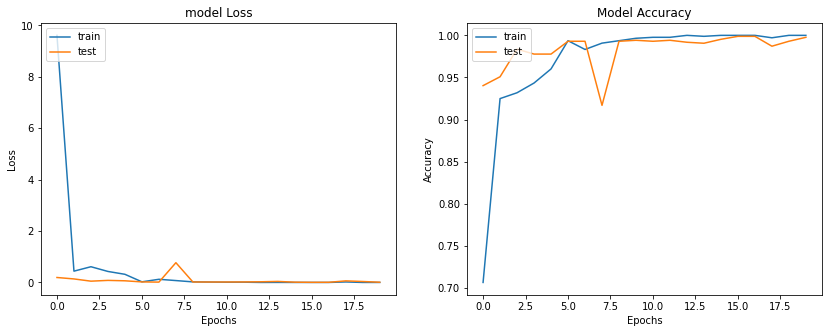

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
model3.save("resnet50.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# MOBILENET

In [38]:
base_model = tf.keras.applications.MobileNet(input_shape=(128,128,3),
                                               include_top=False,
                                                weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False
    
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(512,activation="relu")(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
prediction = tf.keras.layers.Dense(3, activation='softmax')(x)

model4 = Model(inputs=base_model.input, outputs=prediction)

17235968/17225924 [==============================] - 0s 0us/step


In [39]:
from tensorflow.keras.optimizers import RMSprop
model4.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history4 = model4.fit(X_train ,
                    y_train ,
                    epochs=20 ,
                    batch_size=64,
                    validation_split = 0.33,
                    callbacks=[learning_rate_reduction])

Epoch 1/20
28/28 [==============================] - 4s 97ms/step - loss: 9.0637 - accuracy: 0.6511 - val_loss: 2.5107 - val_accuracy: 0.6370
Epoch 2/20
28/28 [==============================] - 1s 40ms/step - loss: 1.0584 - accuracy: 0.7828 - val_loss: 0.3949 - val_accuracy: 0.8431
Epoch 3/20
28/28 [==============================] - 1s 39ms/step - loss: 0.8435 - accuracy: 0.8371 - val_loss: 0.1997 - val_accuracy: 0.9274
Epoch 4/20
28/28 [==============================] - 1s 39ms/step - loss: 0.3431 - accuracy: 0.9058 - val_loss: 0.1478 - val_accuracy: 0.9485
Epoch 5/20
28/28 [==============================] - 1s 40ms/step - loss: 0.5573 - accuracy: 0.8775 - val_loss: 0.0974 - val_accuracy: 0.9590
Epoch 6/20
28/28 [==============================] - 1s 46ms/step - loss: 0.2340 - accuracy: 0.9399 - val_loss: 0.1795 - val_accuracy: 0.9473
Epoch 7/20
28/28 [==============================] - 1s 40ms/step - loss: 0.2899 - accuracy: 0.9382 - val_loss: 0.7948 - val_accuracy: 0.8817

Epoch 00007:

In [40]:
y_pred  = model4.predict(X_test).round()
target_names = [f"{classes[i]}" for i in range(3)]
print(classification_report(y_test, y_pred , target_names =target_names ))

              precision    recall  f1-score   support

     healthy       0.99      1.00      0.99       143
 late_blight       0.98      0.94      0.96       153
early_blight       0.95      0.98      0.96       125

   micro avg       0.97      0.97      0.97       421
   macro avg       0.97      0.97      0.97       421
weighted avg       0.97      0.97      0.97       421
 samples avg       0.97      0.97      0.97       421



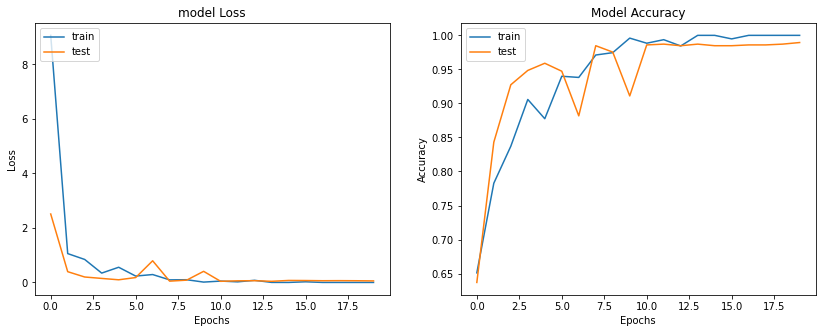

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
model4.save("mobilenet.h5")

In [43]:
classes = {0 : "Healthy",
           1: "Late Blight",
           2 : "Early Blight"}

In [44]:
from PIL import Image
x = "../input/potatofinal/potato/Test/Potato___healthy/5fcbde8f-52af-4963-b324-ff7f4dd6bd4c___RS_HL 1762.JPG"
im = Image.open(x)
im = im.resize((128,128))
pix_val = list(im.getdata())
pix_val_flat = [x for sets in pix_val for x in sets]
Data = np.array(pix_val_flat).reshape(-1,128,128,3)
print('Shape of Data :',Data.shape)

Shape of Data : (1, 128, 128, 3)


In [45]:
print("PREDICTION\n\n")
ans = model3.predict(Data)[0]
print("CONFIDENCE =",max(ans)*100, "%")
index = ans.argmax(axis = 0)
print(classes[index])

PREDICTION


CONFIDENCE = 100.0 %
Healthy
